## Population Pyramid

!!! This function renders only package's internal data, it might not be the most up-to-date
Have a look at api.insee.fr !!!
Getting data:   0%|          | 0/1 [00:00<?, ?it/s]!!! This function is still at an early development stage,
future changes are likely !!!
Getting data: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


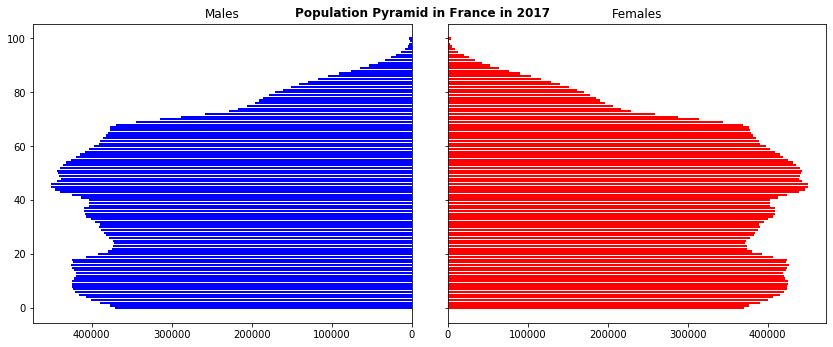

In [1]:
# Subscribe to api.insee.fr and get your credentials!
# Save your credentials with init_conn function :
from pynsee.utils.init_conn import init_conn
init_conn(insee_key="my_insee_key", insee_secret="my_insee_secret")

# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import clear_all_cache; clear_all_cache()"

from pynsee.localdata import *

import pandas as pd
pd.options.mode.chained_assignment = None 
%matplotlib inline
import matplotlib.pyplot as plt

metadata = get_local_metadata()

data = get_local_data(dataset_version='GEO2020RP2017',
                       variables = 'SEXE-AGED100',
                       nivgeo = 'FE',
                       geocodes=['1'])

dataM = data[(data.SEXE == '1') & (data.AGED100 != 'ENS')]
dataF = data[(data.SEXE == '2') & (data.AGED100 != 'ENS')]

dataF['OBS_VALUE'] = dataF['OBS_VALUE'].apply(lambda x: x * -1)

# define plot
y = range(0, len(dataM))
x_male = dataM['OBS_VALUE']
x_female = dataM['OBS_VALUE']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))
fig.suptitle("Population Pyramid in France in 2017", fontweight='bold')
fig.tight_layout(pad = 2)
#define male and female bars
axes[0].barh(y, x_male, align='center', color='blue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='red')
axes[1].set(title='Females')
axes[0].invert_xaxis()


